<a href="https://colab.research.google.com/github/idrkhowto/Stellar-Mass-Estimates-SDSS_DR12/blob/main/SPIDERS_Error_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install astropy

import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install astroquery

#Import packages
from astropy.io import fits
from astropy import units
from astropy.table import Table
import numpy as np, pandas as pd

#Astroquery is what we use to download data from SDSS
from astropy.coordinates import SkyCoord
from astroquery.sdss import SDSS
from astropy import constants as const

from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)

import pickle
pickle.HIGHEST_PROTOCOL = 4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 885.7/885.7 KB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 84.6 MB/s eta 0:00:00


In [4]:
#Load revised SPIDERS dataset

import pandas as pd
import numpy as np

Galaxy_data  = pd.read_hdf('/content/drive/MyDrive/SPIDERS_Dataset_Revised.hdf5', key = 'Galaxies')
Cluster_data = pd.read_hdf('/content/drive/MyDrive/SPIDERS_Dataset_Revised.hdf5', key = 'Clusters')

print(Galaxy_data.zWarning)

0        0
1        0
2        0
3        0
4        4
        ..
62627    0
62628    0
62629    0
62630    0
62631    0
Name: zWarning, Length: 62632, dtype: int32


In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['xtick.direction'], mpl.rcParams['ytick.direction'] = 'in', 'in'
mpl.rcParams['xtick.major.size'], mpl.rcParams['xtick.minor.size'] = 14, 8
mpl.rcParams['xtick.major.width'], mpl.rcParams['xtick.minor.width'] = 1.2, 0.8
mpl.rcParams['xtick.major.pad'], mpl.rcParams['xtick.minor.pad'] = 10, 10
mpl.rcParams['ytick.major.size'], mpl.rcParams['ytick.minor.size'] = 14, 8
mpl.rcParams['ytick.major.width'], mpl.rcParams['ytick.minor.width'] = 1.2, 0.8

plt.rc('xtick',labelsize=22)
plt.rc('ytick',labelsize=22)

In [32]:
#COPIED MAG_R CORRECTION

#Correct apparent Mag_r for dust extinction
Corrected_Mag_r = Galaxy_data['cModelMag_r'] - Galaxy_data['extinction_r']

#Convert corrected apperent mag into absolute magnitude (use distance modulus)
M_r = (Corrected_Mag_r - 5*np.log10(1e6*cosmo.luminosity_distance(Galaxy_data['Galaxy_z']).value/10))

<ipython-input-32-a8cc5b0f4b6d>:7: RuntimeWarning: divide by zero encountered in log10
  M_r = (Corrected_Mag_r - 5*np.log10(1e6*cosmo.luminosity_distance(Galaxy_data['Galaxy_z']).value/10))
<ipython-input-32-a8cc5b0f4b6d>:7: RuntimeWarning: invalid value encountered in log10
  M_r = (Corrected_Mag_r - 5*np.log10(1e6*cosmo.luminosity_distance(Galaxy_data['Galaxy_z']).value/10))


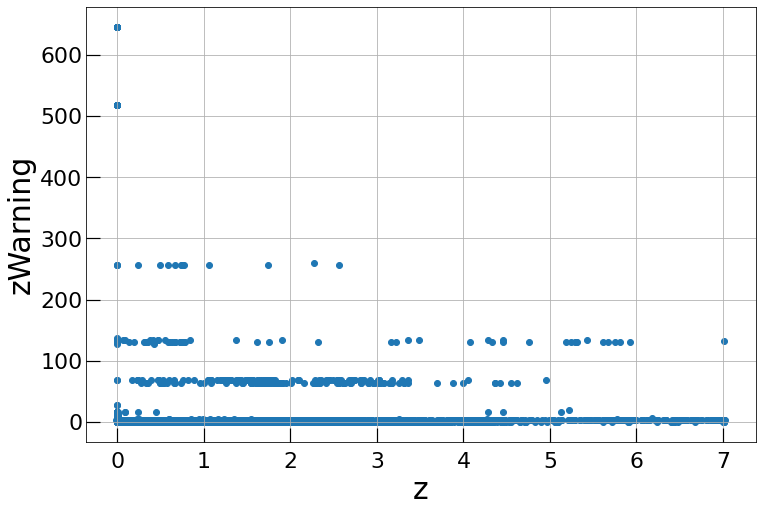

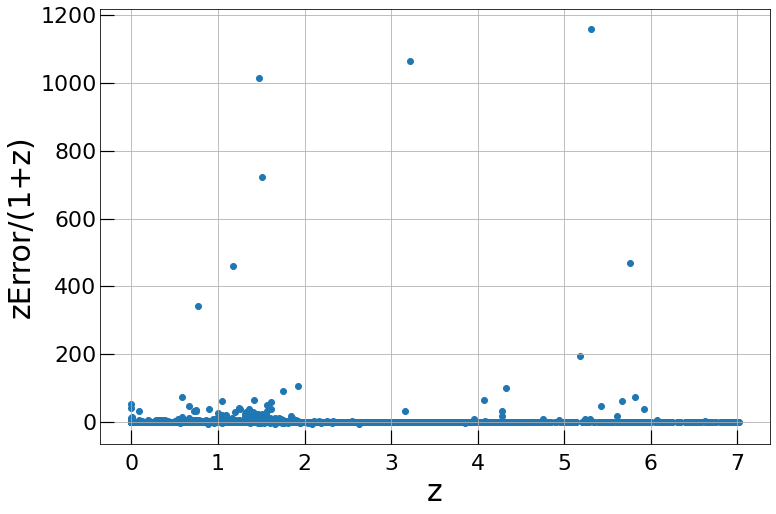

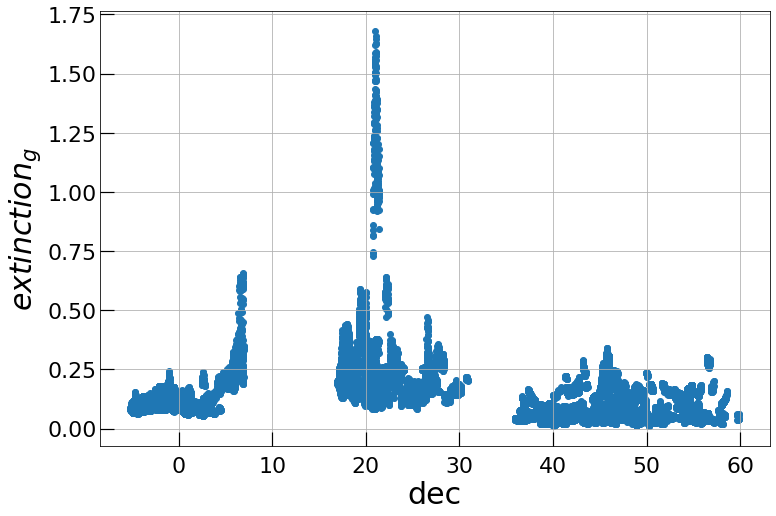

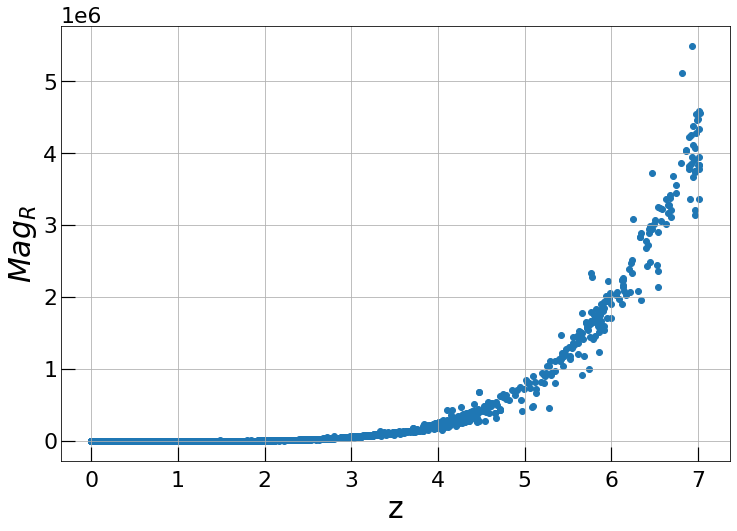

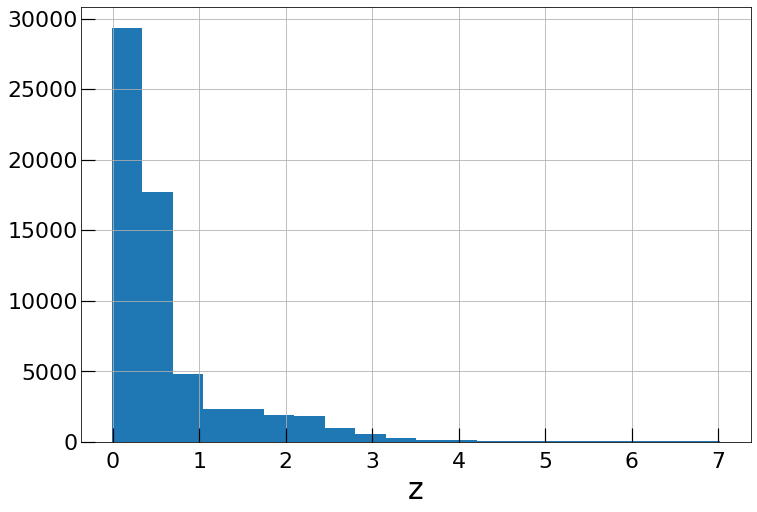

In [6]:
#Revised SPIDERS dataset plots

#zWarning vs. z
plt.figure(figsize=(12,8))
plt.grid()
plt.xlabel('z', size = 30)
plt.ylabel('zWarning', size = 30)
plt.scatter(Galaxy_data.Galaxy_z,Galaxy_data.zWarning)
plt.show()

#zError/(1+z) vs. z
plt.figure(figsize=(12,8))
plt.grid()
plt.xlabel('z', size = 30)
plt.ylabel('zError/(1+z)', size = 30)
plt.scatter(Galaxy_data.Galaxy_z,Galaxy_data.zErr/(1+Galaxy_data.Cluster_z))
plt.show()

#extinction_g vs. declination
plt.figure(figsize=(12,8))
plt.grid()
plt.xlabel('dec', size = 30)
plt.ylabel('$extinction_g$', size = 30)
plt.scatter(Galaxy_data.dec,Galaxy_data.extinction_g)
plt.show()

#Mag_R vs. z
plt.figure(figsize=(12,8))
plt.grid()
plt.xlabel('z', size = 30)
plt.ylabel('$Mag_R$', size = 30)
plt.scatter(Galaxy_data.Galaxy_z,Galaxy_data.M_r)
plt.show()

#z Histogram
plt.figure(figsize=(12,8))
plt.grid()
plt.xlabel('z', size = 30)
plt.hist(Galaxy_data.Galaxy_z, bins=20)
plt.show()

In [34]:
#COPIED K-CORRECTION CELL

#Need g-r color for computing K-correction using cmodel magnitudes
gr = Galaxy_data['cModelMag_g'] - Galaxy_data['extinction_g'] - Galaxy_data['cModelMag_r'] + Galaxy_data['extinction_r']

#Load k-correction module from "http://kcor.sai.msu.ru/calc_kcor.py"
#This module is already in the gdrive folder
from calc_kcor import calc_kcor 

# this k-correction is not designed for z>0.6, but I'm using it for all redshifts anyway
# Need to think more about how to do this correctly
kcorr = calc_kcor('r', Galaxy_data['Galaxy_z'], 'g - r', gr)

#Employ evolution corrections and k-correction to get final Magnitude
Galaxy_data['M_r'] = M_r + 1.3*Galaxy_data['Galaxy_z'] - kcorr

ModuleNotFoundError: ignored

AttributeError: ignored

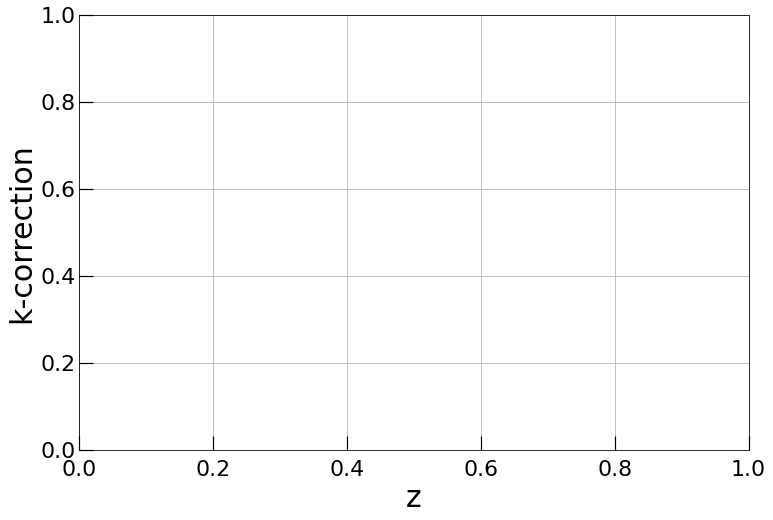

In [14]:
#k-correction vs. z
plt.figure(figsize=(12,8))
plt.grid()
plt.xlabel('z', size = 30)
plt.ylabel('k-correction', size = 30)
plt.scatter(Galaxy_data.Cluster_z,Galaxy_data.kcorr)
plt.show()